In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

import mglearn

In [3]:
df = pd.read_csv('data/tweet_data.csv')

In [4]:
df.head()

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
0,1070867471245164544,2018-12-07 02:27:55,-1,-1,98,False,True,False,64,https://pbs.twimg.com/media/Dtx8SiIWkAImVsb.jpg,34,-1,The immediate impulse for an alliance of the E...,Business,23464532,5988062,The Economist,NaN
1,1070868017888837633,2018-12-07 02:30:05,-1,-1,13,False,True,False,10,https://pbs.twimg.com/media/Dtx8yTyW4AEciqP.jpg,3,-1,America's economy is flashing some warning sig...,Business,1732809,16184358,CNN Business,NaN
2,1070868012864028673,2018-12-07 02:30:04,-1,-1,12,False,True,False,8,NaN,4,-1,Lyft files for what is expected to be one of t...,Business,2253989,25053299,FORTUNE,NaN
3,1070867995239555075,2018-12-07 02:30:00,-1,-1,5,False,True,False,4,NaN,1,-1,"Exporters still waiting to get Rs 6,000 crore ...",Business,1704056,43855487,Business Standard,NaN
4,1070867995205885952,2018-12-07 02:30:00,-1,-1,5,False,True,False,2,NaN,3,-1,Ride-hailing firm Lyft races to leave Uber beh...,Business,1997662,15110357,Reuters Business,https://video.twimg.com/amplify_video/10708116...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785916 entries, 0 to 785915
Data columns (total 18 columns):
tweetID       785916 non-null int64
crDate        785916 non-null object
edInput       785916 non-null int64
editor        785916 non-null int64
engages       785916 non-null int64
isApproved    785916 non-null bool
isEdNeed      785916 non-null bool
isRT          785916 non-null bool
likes         785916 non-null int64
photoUrl      277896 non-null object
retweets      785916 non-null int64
rtUsID        785916 non-null int64
text          785916 non-null object
topicName     785916 non-null object
usFlwrs       785916 non-null int64
usID          785916 non-null int64
usName        785916 non-null object
videoUrl      140491 non-null object
dtypes: bool(3), int64(9), object(6)
memory usage: 92.2+ MB


In [6]:
df.describe()

,tweetID,edInput,editor,engages,likes,retweets,rtUsID,usFlwrs,usID
count,7.859160e+05,785916.000000,785916.000000,7.859160e+05,7.859160e+05,7.859160e+05,7.859160e+05,7.859160e+05,7.859160e+05
mean,1.115213e+18,0.206035,2311.963123,1.403637e+03,1.085909e+03,3.177282e+02,4.365098e+16,4.472701e+06,1.085276e+17
std,2.925292e+16,1.439867,2495.158883,1.665960e+04,1.293993e+04,4.053267e+03,1.894384e+17,9.149778e+06,3.010486e+17
min,5.354500e+04,-1.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.200000e+01
25%,1.095791e+18,-1.000000,-1.000000,2.300000e+01,1.600000e+01,6.000000e+00,-1.000000e+00,1.426280e+05,1.551377e+07
50%,1.116465e+18,-1.000000,-1.000000,6.400000e+01,4.500000e+01,1.800000e+01,-1.000000e+00,9.668265e+05,3.618422e+07
75%,1.137676e+18,1.000000,5003.000000,2.500000e+02,1.840000e+02,6.500000e+01,-1.000000e+00,3.603135e+06,9.545908e+08
max,1.154179e+18,4.000000,5101.000000,4.152927e+06,3.206434e+06,1.335638e+06,1.108957e+18,1.057384e+08,1.153467e+18


In [7]:
df.columns

Index(['tweetID', 'crDate', 'edInput', 'editor', 'engages', 'isApproved',
       'isEdNeed', 'isRT', 'likes', 'photoUrl', 'retweets', 'rtUsID', 'text',
       'topicName', 'usFlwrs', 'usID', 'usName', 'videoUrl'],
      dtype='object')

In [11]:
df['topicName'].unique()

array(['Business', 'Animal', 'Memes', 'Nature', 'Travel', 'Interesting',
       'News', 'Fashion', 'Art', 'Personal Development', 'Motivational',
       'DIY & Craft', 'Editorial Pics', 'Funny', 'Poem', 'World Leaders',
       'Entrepreneurship', 'US News', 'Journalists', 'Flowers',
       'Cryptocurrency', 'Photography', 'Design & Architecture',
       'Fitness', 'Spirituality', 'Startup', 'Space', 'Technology',
       'Digital Media & Internet', 'Psychology', 'Science', 'Basketball',
       'Humor', 'Mindfulness', 'Medical', 'Informative', 'Love', 'Stocks',
       'Nanotech', 'Biotech', 'science', 'Random'], dtype=object)

In [15]:
df['label'] = df['topicName'].apply(
    lambda topic: 1 if topic == 'Nature' else 0)

In [16]:
df.head()

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl,label
0,1070867471245164544,2018-12-07 02:27:55,-1,-1,98,False,True,False,64,https://pbs.twimg.com/media/Dtx8SiIWkAImVsb.jpg,34,-1,The immediate impulse for an alliance of the E...,Business,23464532,5988062,The Economist,NaN,0
1,1070868017888837633,2018-12-07 02:30:05,-1,-1,13,False,True,False,10,https://pbs.twimg.com/media/Dtx8yTyW4AEciqP.jpg,3,-1,America's economy is flashing some warning sig...,Business,1732809,16184358,CNN Business,NaN,0
2,1070868012864028673,2018-12-07 02:30:04,-1,-1,12,False,True,False,8,NaN,4,-1,Lyft files for what is expected to be one of t...,Business,2253989,25053299,FORTUNE,NaN,0
3,1070867995239555075,2018-12-07 02:30:00,-1,-1,5,False,True,False,4,NaN,1,-1,"Exporters still waiting to get Rs 6,000 crore ...",Business,1704056,43855487,Business Standard,NaN,0
4,1070867995205885952,2018-12-07 02:30:00,-1,-1,5,False,True,False,2,NaN,3,-1,Ride-hailing firm Lyft races to leave Uber beh...,Business,1997662,15110357,Reuters Business,https://video.twimg.com/amplify_video/10708116...,0


In [17]:
df[df['topicName']=='Nature']

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl,label
44,1070875544202432514,2018-12-07 03:00:00,-1,-1,44,False,True,False,33,https://pbs.twimg.com/media/DtuIrMXWoAA5Wve.jpg,11,-1,"Lack Lake, Rocky mountain national Park, Color...",Nature,67520,917084527440355329,Sara Walker,NaN,1
45,1070590403454349312,2018-12-06 08:06:57,-1,-1,88,False,True,True,77,NaN,11,2470325805,How Kinky Are You?\n\nhttps://t.co/J8I1HNeD5i,Nature,4255,4530305294,Akp,NaN,1
46,1070591387551318016,2018-12-06 08:10:52,-1,-1,59,False,True,True,50,NaN,9,2470325805,12 Sex Scenes with Actors Who Hated Each Other...,Nature,4255,4530305294,Akp,NaN,1
47,1060767872903917568,2018-11-09 05:35:43,-1,-1,1817,False,True,True,1489,https://pbs.twimg.com/media/Dcnhi_FXcAAQPXk.jpg,328,2470325805,have you ever seen anyone so happy to have jam...,Nature,141170,2718980845,ღ Girls Outfit ღ,NaN,1
105,1070880221241327616,2018-12-07 03:18:35,-1,-1,3113,False,True,False,2174,NaN,939,-1,Like something out of a fairy tale 🦌 https://t...,Nature,132013,920512279556304901,Beauty Nature,https://video.twimg.com/ext_tw_video/107088010...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785876,1154029794557931520,2019-07-24 14:05:18,-1,-1,68,False,True,True,42,NaN,26,345697781,"""Of cowboys, fish and pangolins"": How the US p...",Nature,6898,211177035,Rachel Nuwer,NaN,1
785884,1153356593196601344,2019-07-22 17:30:14,-1,-1,44,False,True,True,37,https://pbs.twimg.com/media/EAGLskxXsAAnBWd.jpg,7,2866476539,Over 100 Storm Petrels sighted from the outer ...,Nature,34,1145336761821880321,Will Smith,NaN,1
785885,1154104361053773825,2019-07-24 19:01:36,-1,-1,130,False,True,True,116,https://pbs.twimg.com/media/EAQzmI1XoAA0g8M.jpg,14,2866476539,Spotted Flycatcher chicks - 6 in the nest - pa...,Nature,1154,2168910512,Hilary Chambers,NaN,1
785894,1154045614746824707,2019-07-24 15:08:10,-1,-1,3930,False,True,True,3075,https://pbs.twimg.com/media/EAP-XNuU8AAnAve.jpg,855,933209086870437888,This 😍 https://t.co/LVxKNbK406,Nature,164463,2908344684,Couples Goals ღ,NaN,1


In [28]:
df_tweet_label = df[['text', 'label']]

In [29]:
df_tweet_label.head()

,text,label
0,The immediate impulse for an alliance of the E...,0
1,America's economy is flashing some warning sig...,0
2,Lyft files for what is expected to be one of t...,0
3,"Exporters still waiting to get Rs 6,000 crore ...",0
4,Ride-hailing firm Lyft races to leave Uber beh...,0


In [44]:
X = df_tweet_label['text'].to_numpy()
y = df_tweet_label['label'].to_numpy()

In [52]:
X.shape

(785916,)

In [54]:
X[:5]

array(["The immediate impulse for an alliance of the EU's northern states is Brexit https://t.co/nlhUD36hay https://t.co/shwMWpjjuK",
       "America's economy is flashing some warning signs, but -- for now -- the labor market appears to be going strong https://t.co/xvCPgtqMzy https://t.co/0sQdzAsME3",
       'Lyft files for what is expected to be one of the hottest IPOs in 2019 https://t.co/qEjyniazlD',
       'Exporters still waiting to get Rs 6,000 crore worth of input tax credit refunds\n\nMany being denied tax refunds by state governments, such as Andhra Pradesh, Uttar Pradesh, Bihar and Chhattisgarh, who say they are cash starved\n\n@Subhayan_ism @GST_Council\n\nhttps://t.co/QRBg8b98Rr',
       'Ride-hailing firm Lyft races to leave Uber behind in IPO chase https://t.co/0qCsdx2LYS https://t.co/gHZLUntYkL'],
      dtype=object)

In [53]:
y.shape

(785916,)

In [55]:
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [46]:
X_train

array(['Make this twist on the McGriddle for an easy keto-friendly breakfast. https://t.co/cvb9ty5TJb',
       'Apple, Amazon called out for not referring to Hong Kong and Taiwan as part of China https://t.co/sACzqD0gln by @YimouLee @horwitzjosh $AAPL $AMZN https://t.co/7Px3JptwGf',
       'Feed the areas of your life you want to grow. Starve the parts that need to go. #quote https://t.co/NfigNMZlBX',
       ...,
       'Today, @dog_rates gave their 8th 15/10. Look back at all the other puppers who won the same rating. https://t.co/yUQFd0yF9u',
       'Begin at the beginning and go on till you come to the end: then stop. - Lewis Carroll #quote https://t.co/Tx3yFgDSLQ',
       'Victims of mass shootings at Emanuel AME Church and New Light Congregation of the Tree of Life worshipped together Friday and Sunday in Charleston https://t.co/1fp7o3byvR'],
      dtype=object)

In [49]:
X_train.shape

(526563,)

In [47]:
type(X_train)

numpy.ndarray

In [48]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
y_train[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [57]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [58]:
print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [509922  16641]


In [59]:
print("Number of documents in test data: {}".format(len(X_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))

Number of documents in test data: 259353
Samples per class (test): [250973   8380]


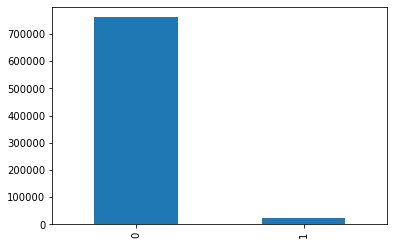

In [84]:
df_tweet_label['label'].value_counts().plot(kind='bar')

In [61]:
vect = CountVectorizer().fit(X_train)

In [63]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [64]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 696101
First 20 features:
['00', '000', '0000', '000000', '00000001', '00000007', '00000100', '00000158', '00000175', '00000192', '000003020', '00000311', '00005', '000066', '0001', '00011816', '000135', '00025', '0004', '0005800']
Features 20010 to 20030:
['244th', '244vnxjd9y', '244z4ou90r', '245', '2450', '2451il2hk3', '2457', '245b', '245iiazksb', '245xrsicsz', '245ynnduhd', '246', '2460', '24604wcwq1', '246erb7epr', '246fcsmjh2', '246ot4lmnh', '246zmnyqpj', '247', '2474']
Every 2000th feature:
['00', '0b4kumsv4r', '0ijvamegl8', '0pw9cleigk', '0wxgsxkeq7', '13obcgrcuy', '1auj6bgxxs', '1hu8u6lhqc', '1ozyphxot6', '1wahlyd5k5', '243gptcphr', '2db0stpcmg', '2kb52ul57y', '2qyi79tthz', '2y2fhkybuc', '37mb8vtdxo', '3fah7midyz', '3mfvclfjdc', '3tfpsxisaz', '40ddmfoa5a', '4b2n2jpajv', '4i4oprod0b', '4p9x4nis0r', '4wkcninuup', '556vqbskqq', '5e0djlyk1k', '5lbkkifdfo', '5s63hgojpg', '5z8ispae3o', '69znlz6yv6', '6gur1roeln', '6nqukmnkfh', '6urmc74blp', '733', '7czajzwclx', 

In [62]:
X_train_vect = vect.transform(X_train)
print("X_train:\n{}".format(repr(X_train_vect)))

X_train:
<526563x696101 sparse matrix of type '<class 'numpy.int64'>'
	with 9538836 stored elements in Compressed Sparse Row format>


In [66]:
scores = cross_val_score(LogisticRegression(max_iter=5000), X_train_vect, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.98


In [68]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train_vect, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.98
Best parameters:  {'C': 1}


In [69]:
X_test_vect = vect.transform(X_test)
print("Test score: {:.2f}".format(grid.score(X_test_vect, y_test)))

Test score: 0.98


In [71]:
vect_min5 = CountVectorizer(min_df=5).fit(X_train)
X_train_vect_min5 = vect_min5.transform(X_train)
print("X_train with min_df: {}".format(repr(X_train_vect_min5)))

X_train with min_df: <526563x49098 sparse matrix of type '<class 'numpy.int64'>'
	with 8791952 stored elements in Compressed Sparse Row format>


In [72]:
feature_names_min5 = vect_min5.get_feature_names()

print("First 50 features:\n{}".format(feature_names_min5[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names_min5[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names_min5[::700]))

First 50 features:
['00', '000', '000ft', '000km', '000lbs', '000th', '001', '002', '003', '005', '007', '007_robj', '008', '009', '00am', '00gj9agkbg', '00pm', '01', '015', '01am', '01empero', '01pm', '02', '020', '025', '027jbpqasa', '03', '035', '037', '03chq6rdg1', '04', '046', '04avv7rtap', '04xkjvmnoo', '05', '050', '055', '06', '060', '06xkkvdykj', '07', '07pm', '08', '09', '0a9t0nlqaw', '0afrcgawcm', '0ayvpszldt', '0d5pgrnthv', '0h11i16wnb', '0hb9q41ack']
Features 20010 to 20030:
['hangar', 'hanger', 'hangers', 'hanging', 'hangings', 'hangout', 'hangouts', 'hangover', 'hangs', 'hangzhou', 'hanh', 'hank', 'hankering', 'hanks', 'hanna', 'hannah', 'hannah_furness', 'hannahmckay88', 'hannibal', 'hannity']
Every 700th feature:
['00', '24pm', '6gt2xtb8yy', 'activate', 'alfonso', 'antetokounmpo', 'ashrafghani', 'bacteria', 'beings', 'blessing', 'breakdown', 'buzz', 'catastrophe', 'chitin', 'coin_shark', 'constellations', 'cremated', 'dance', 'denali', 'discloses', 'drained', 'ehtblack

In [73]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train_vect_min5, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.98


In [75]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                     LogisticRegression(max_iter=5000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.98


In [76]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset:
X_train_vect = vectorizer.transform(X_train)
# find maximum value for each of the features over dataset:
max_value = X_train_vect.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['weekendwisdom' 'quoteoftheday' 'featured' 'mention' 'writes' 'co'
 'https' 'reveals' 'infographics' 'explains' 'thursdaythoughts' 'smm'
 'fargo' 'tuesdaythoughts' 'reportedly' 'develop' 'naturally'
 'ronald_vanloon' 'authorities' 'jblefevre60']
Features with highest tfidf: 
['mainnet' 'dmme' 'tradeogre' 'learn' 'mp3' '31st' 'fav' 'pk'
 'tradeogreseason' 'ta' 'stay' '___' 'yes' 'doo' 'okay' 'really' 'lit'
 'bla' 'so' '__']


In [77]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['co' 'https' 'the' 'to' 'of' 'in' 'and' 'is' 'for' 'on' 'you' 'this' 'it'
 'with' 'that' 'are' 'by' 'at' 'be' 'from' 'your' 'more' 'new' 'as' 'have'
 'an' 'will' 'what' 'can' 'here' 'has' 'how' 'but' 'we' 'not' 'one'
 'about' 'quote' 'if' 'all' 'up' 'our' 'out' 'who' 'was' 'trump' 'after'
 'just' 'his' 'its' 'they' 'people' 'now' 'when' 'my' 'get' 'their' 'he'
 'like' 'do' 'life' 'so' 'world' 'time' 'says' 'than' 'don' 'year' 'or'
 'these' 'day' 'first' 'over' 'no' 'make' 'into' 'via' 're' 'us' 'most'
 'today' 'there' 'some' 'see' 'want' 'could' 'me' 'best' 'been' 'why'
 'may' 'president' 'her' 'love' 'back' 'them' 'good' 'art' 'years' 'work']


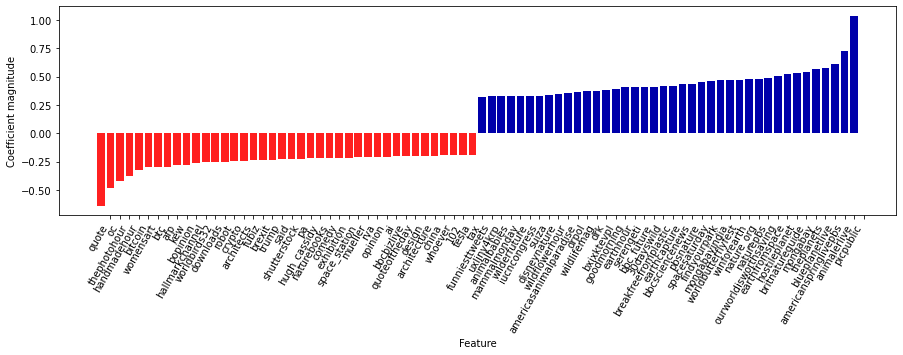

In [79]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names, n_top_features=40)

max_iter=5000

In [80]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# running the grid-search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

e:\Users\user\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
e:\Users\user\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

e:\Users\user\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
e:\Users\user\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

e:\Users\user\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
e:\Users\user\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

Best cross-validation score: 0.98
Best parameters:
{'logisticregression__C': 10, 'tfidfvectorizer__ngram_range': (1, 3)}


e:\Users\user\anaconda3\envs\metis\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


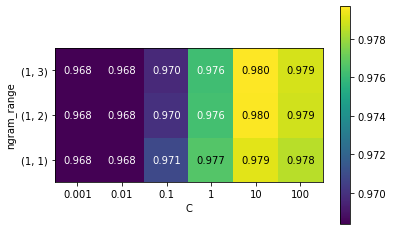

In [81]:
# extract scores from grid_search
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

(-22.0, 22.0)

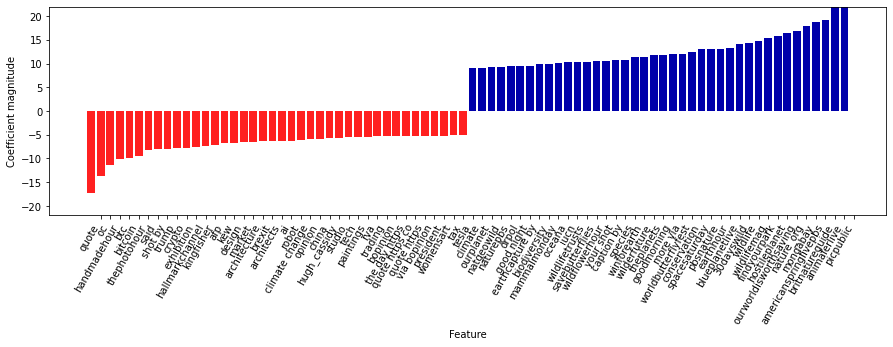

In [82]:
# extract feature names and coefficients
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)
plt.ylim(-22, 22)

(-22.0, 22.0)

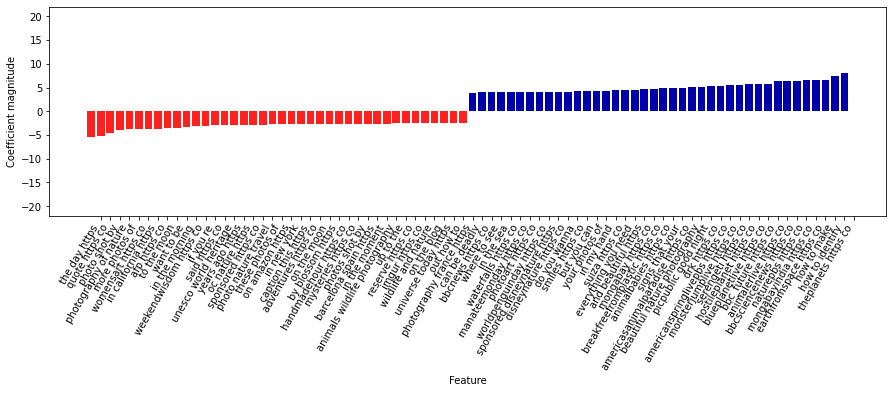

In [83]:
# find 3-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# visualize only 3-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)
plt.ylim(-22, 22)

In [87]:
y_pred = grid.best_estimator_.predict(X_train)

In [89]:
print(confusion_matrix(y_train, y_pred))

[[509490    432]
 [  5131  11510]]


In [94]:
score_train = f1_score(y_train, y_pred, average = 'binary')
print('F-Measure: %.3f' % score_train)

F-Measure: 0.805


In [92]:
y_test_pred = grid.best_estimator_.predict(X_test)

In [93]:
print(confusion_matrix(y_test, y_test_pred))

[[250176    797]
 [  4504   3876]]


In [95]:
score_test = f1_score(y_test, y_test_pred, average = 'binary')
print('F-Measure: %.3f' % score_test)

F-Measure: 0.594


In [96]:
actual = y_test.tolist() 
predicted = y_test_pred 
print (classification_report(actual, predicted) )

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    250973
           1       0.83      0.46      0.59      8380

    accuracy                           0.98    259353
   macro avg       0.91      0.73      0.79    259353
weighted avg       0.98      0.98      0.98    259353

